<a href="https://colab.research.google.com/github/luiselys/NGG605public/blob/main/ExampleBinomial_DistributionfromPaper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PennNGG/Quantitative-Neuroscience/blob/master/Probability%20Distributions/Python/Binomial.ipynb)

# Definition

The binomial distribution is a discrete probability distribution that describes the probability of obtaining exactly k successes out of n Bernoulli trials, which are individual binary outcomes that each have a success probability of p. For example, if you flip a coin 10 times, what is the probability that it will come up heads 0, 1, 2, ... 10 times?

Mathematically, this distribution defines the probability of obtaining *k* successes in *n* trials given a constant probability of success *p* on each trial, which is defined as:

[1] $P(X=k\: successes)=\left ( \frac{n}{k} \right )p^{k}\left ( 1-p \right )^{n-k}$

for *k* = 0, 1, 2, ... , *n*, and where

$\left ( \frac{n}{k} \right )=\frac{n!}{k!\left ( n-k \right )!}$

 is called the "binomial coefficient" and is pronounced "[n-choose-k](https://www.hackmath.net/en/calculator/n-choose-k)"

# Getting Started with Code


Matlab code is found in the [NGG Statistics GitHub Repository](https://github.com/PennNGG/Statistics.git) under "Probability Distributions/Binomial.m".

Python code is included below. First run the code cell just below to make sure all of the required Python modules are loaded, then you can run the other cell(s).

In [3]:
import numpy as np
import random as rnd
import collections
import matplotlib.pyplot as plt
import time
import scipy.stats as st

from scipy.stats import bernoulli, binom, poisson, chi2
from IPython.display import clear_output
from operator import itemgetter
from statsmodels.stats import proportion

from numpy import matlib

# Tutorial

In [ ]:
# Choose some values for the parameters n and p
p = 0.7
n = 1000

# Generate random picks. Note that this is as if we generated Bernoulli trials
#   as above, but then just counted the successes in each "experiment"
num_successes = binom.rvs(n,p) # uses the "random variates" method (rvs) of binom

# Print out the results
print(f'{num_successes} successes out of {n} trials, simulated p = {p:.4f}, empirical p = {num_successes/n:.4f}')

697 successes out of 1000 trials, simulated p = 0.7000, empirical p = 0.6970


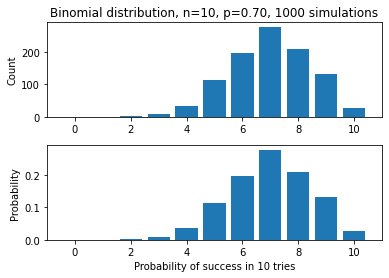

In [ ]:
# The full probability distribution describes the probabilty of obtaining each
#   possible number of successes (k), given n and p. If we set n=10, the the
#   possible values of k are 0, 1, ..., 10. Now we use binom.rvs to simulate
#   many different picks to get a full distribution
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Show a bar plot (histogram) of all of the possible outcomes
counts = collections.Counter(outcomes)
plt.subplot(211)
plt.bar(counts.keys(), counts.values())
plt.xlim([-1, n+1])
plt.title(f'Binomial distribution, n={n}, p={p:.2f}, {num_experiments} simulations')
plt.ylabel('Count')

# Show a normalized version that is a pdf. Here counts (the x-axis of the histogram)
#   is a DISCRETE variable, so we just have to add up the values
normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}
plt.subplot(212)
plt.bar(normalized_counts.keys(), normalized_counts.values())
plt.xlim([-1, n+1])
plt.xlabel(f'Probability of success in {n} tries')
plt.ylabel('Probability')
plt.subplots_adjust(hspace=0.3)

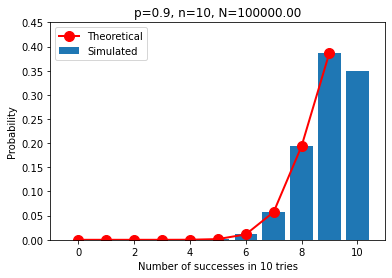

In [ ]:
# Now let's make a fun animation showing different values of p and N.
#   Note that, of course, the more picks you make of the random variable
#   (higher N), the more closely the outcomes (the "samples") match the true
#   distribution.
n=10
xs = range(0, n)
f = plt.figure()
for p in np.arange(0, 1, 0.1):
    for N in np.round(np.logspace(1,5,10)):

        # Get the true binomial pdf
        Y = binom.pmf(xs,n,p)

        # Get the random picks, make histogram and normalize
        counts = collections.Counter(binom.rvs(n,p,size=int(N)))
        normalized_counts = {k: v / total for total in (sum(counts.values()),) for k, v in counts.items()}

        # Show both
        plt.bar(normalized_counts.keys(), normalized_counts.values())
        plt.plot(xs, Y, 'ro-', linewidth=2, markersize=10)

        # Labels, etc
        plt.title(f'p={p:.1f}, n={n}, N={N:.2f}')
        plt.xlabel(f'Number of successes in {n} tries')
        plt.ylabel('Probability')
        plt.axis([-1, n+1, 0, 0.45])
        plt.legend(('Theoretical', 'Simulated'))
        plt.show()

        # Wait
        time.sleep(0.1)

        # Clear for next plot
        clear_output(wait=True)



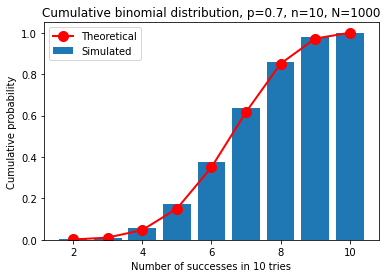

In [ ]:
# The cumulative distribution function is just the proability of obtaining an
#   outcome that is equal to OR LESS THAN a particular value.
p = 0.7
n = 10                      # number of "trials" per "experiment"
num_experiments = 1000;     # number of "experiments"
outcomes = binom.rvs(n,p,size=num_experiments)

# Make histogram
counts = collections.Counter(outcomes)

# Unzip keys from values in a sorted order
keys, values = zip(*sorted(counts.items(), key=itemgetter(0)))

# Compute the cumulative sum of the counts normalized by the total counts (so
#   it is a probability function and not just a histogram -- note that the final
#   value in the cdf should equal 1 because every value should be equal to or
#   less than that value).
total = sum(values)
cumulative_ps = [x/total for x in np.cumsum(values)]

# Plot as a bar graph
plt.bar(keys, cumulative_ps)

# Compare it to the real binomial cumulative distribution, which we find
#   using binom.cdf
Y = binom.cdf(keys,n,p)
plt.plot(keys, Y, 'ro-', linewidth=2, markersize=10)

# Labels, etc
plt.title(f'Cumulative binomial distribution, p={p:.1f}, n={n}, N={num_experiments}')
plt.xlabel(f'Number of successes in {n} tries')
plt.ylabel('Cumulative probability')
plt.legend(('Theoretical', 'Simulated'))

 # MY EXAMPLE OF A BINOMIAL DISTRIBUTION

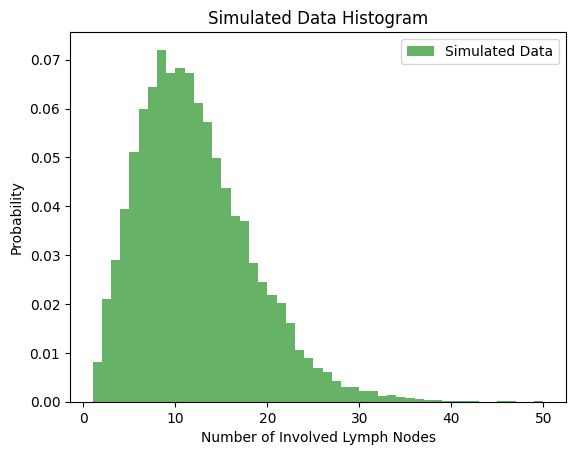

In [1]:
import numpy as np
from scipy.stats import nbinom
import matplotlib.pyplot as plt

# Define the parameters for the negative binomial distribution
# You can adjust these parameters to match the characteristics of the specific cancer type
k = 5  # Shape parameter (controls overdispersion)
p = 0.3  # Probability of success

# Simulate data based on the negative binomial distribution
num_samples = 10000  # Number of data points to simulate
simulated_data = nbinom.rvs(k, p, size=num_samples)

# Plot a histogram of the simulated data
plt.hist(simulated_data, bins=range(1, max(simulated_data) + 2), density=True, alpha=0.6, color='g', label='Simulated Data')
plt.xlabel('Number of Involved Lymph Nodes')
plt.ylabel('Probability')
plt.title('Simulated Data Histogram')
plt.legend()
plt.show()

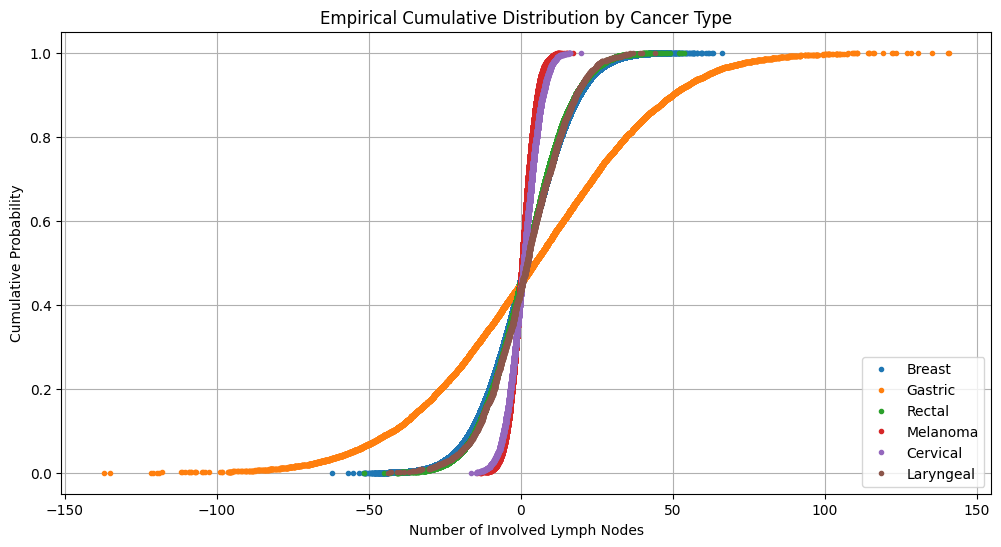

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table you provided
cancer_types = ["Breast", "Gastric", "Rectal", "Melanoma", "Cervical", "Laryngeal"]
num_cases = [224656, 12404, 18015, 9118, 4117, 2443]
mean_involved_nodes = [1.5, 4.0, 1.8, 0.5, 0.8, 1.9]
variance_involved_nodes_squared = [14**2, 36**2, 13**2, 4**2, 5**2, 13**2]

# Initialize an empty dictionary to store data for each cancer type
cancer_data = {}

# Simulate data for each cancer type based on the provided mean and variance
for i, cancer_type in enumerate(cancer_types):
    mean = mean_involved_nodes[i]
    variance = variance_involved_nodes_squared[i]

    # Generate simulated data based on normal distribution (mean and variance)
    simulated_data = np.random.normal(mean, np.sqrt(variance), num_cases[i])

    # Sort the data
    simulated_data.sort()

    # Store the data in the dictionary
    cancer_data[cancer_type] = simulated_data

# Create empirical cumulative distribution plots for each cancer type
plt.figure(figsize=(12, 6))
for cancer_type, data in cancer_data.items():
    # Calculate the cumulative distribution
    x = np.sort(data)
    y = np.arange(1, len(data) + 1) / len(data)

    # Plot the empirical cumulative distribution
    plt.plot(x, y, marker='.', linestyle='none', label=cancer_type)

# Add labels and legend
plt.xlabel('Number of Involved Lymph Nodes')
plt.ylabel('Cumulative Probability')
plt.title('Empirical Cumulative Distribution by Cancer Type')
plt.legend(loc='lower right')

# Show the plot
plt.grid(True)
plt.show()

# Additional Resources

Working with the binomial distribution in [Matlab](https://www.mathworks.com/help/stats/binomial-distribution.html), [R](https://www.rdocumentation.org/packages/stats/versions/3.3/topics/Binomial), and [Python](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html).

# Credits

Copyright 2021 by Joshua I. Gold, University of Pennsylvania